# **Assignment 2 - Spartial Filters** #

D/ENG/21/0108/EE - MWM Shakir


Question 1

Question 2

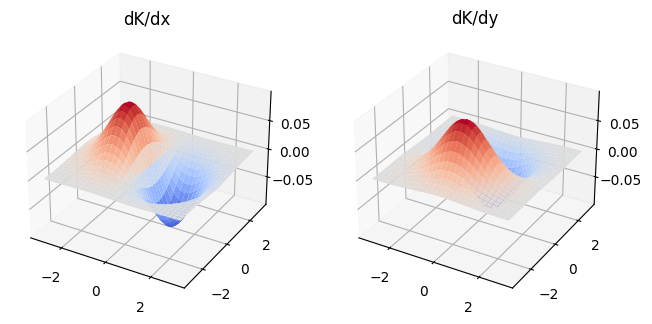

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#defining the variable regions
x, y = np.meshgrid(np.arange(-3, 3.1, 0.1), np.arange(-3, 3.1, 0.1))
z = np.zeros_like(x)

sigma = 1
#3D gaussian kernel
K = 1.0 / (2.0 * np.pi * sigma**2) * np.exp(-(x**2 + y**2 + z**2) / (2.0 * sigma**2))

#derivatives of 3D gaussian kernel
dK_dx = (-x / sigma**2) * K
dK_dy = (-y / sigma**2) * K

# plot the kernels
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(131, projection='3d')
ax1.set_title("dK/dx")
ax1.plot_surface(x, y, dK_dx, cmap='coolwarm')

ax2 = fig.add_subplot(132, projection='3d')
ax2.set_title("dK/dy")
ax2.plot_surface(x, y, dK_dy, cmap='coolwarm')

plt.show()
